<a href="https://colab.research.google.com/github/sidsharma3/Free-Rice-Player/blob/master/MalariaCellIdentification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [15]:
parasitized_data = os.listdir('/gdrive/My Drive/Cell Data/positivetrain/')
print(parasitized_data[:10]) #the output we get are the .png files

uninfected_data = os.listdir('/gdrive/My Drive/Cell Data/negativetrain/')
print('\n')
print(uninfected_data[:10])

['C33P1thinF_IMG_20150619_121229a_cell_177.png', 'C33P1thinF_IMG_20150619_121300a_cell_156.png', 'C33P1thinF_IMG_20150619_121229a_cell_179.png', 'C33P1thinF_IMG_20150619_121229a_cell_178.png', 'C33P1thinF_IMG_20150619_121411a_cell_189.png', 'C33P1thinF_IMG_20150619_121411a_cell_190.png', 'C33P1thinF_IMG_20150619_121435a_cell_173.png', 'C33P1thinF_IMG_20150619_121503a_cell_159.png', 'C33P1thinF_IMG_20150619_121503a_cell_158.png', 'C37BP2_thinF_IMG_20150620_131423a_cell_92.png']


['C99P60ThinF_IMG_20150918_142128_cell_56.png', 'C99P60ThinF_IMG_20150918_142128_cell_53.png', 'C99P60ThinF_IMG_20150918_142128_cell_55.png', 'C99P60ThinF_IMG_20150918_142128_cell_52.png', 'C99P60ThinF_IMG_20150918_142128_cell_3.png', 'C99P60ThinF_IMG_20150918_142128_cell_47.png', 'C99P60ThinF_IMG_20150918_142128_cell_45.png', 'C99P60ThinF_IMG_20150918_142128_cell_15.png', 'C99P60ThinF_IMG_20150918_142128_cell_14.png', 'C99P60ThinF_IMG_20150918_142128_cell_11.png']


In [0]:
trainingdata = []
categories = ["positivetrain", "negativetrain"]

for index in categories:
  for img in os.listdir("/gdrive/My Drive/Cell Data/" + index):
    img_array = cv2.imread("/gdrive/My Drive/Cell Data/" + index + "/" + img)
    new_array = cv2.resize(img_array, (50, 50)) 
    if index == "positivetrain":
      trainingdata.append([new_array, 1])
    else:
      trainingdata.append([new_array, 0])
    

In [17]:
import random
print(len(trainingdata))
random.shuffle(trainingdata)

264


In [0]:
import numpy as np
data = []
label = []

for feature, labels in trainingdata:
  data.append(feature)
  label.append(labels)
  
data = np.array(data).reshape(-1, 50, 50, 3)
data = data/255.0

In [22]:
print(len(data))
print(len(label))

264
264


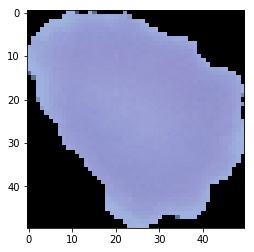

0


In [23]:
plt.imshow(data[0])
plt.show()
print(label[0])

In [0]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers

In [48]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())  

model.add(Dense(512, activation = 'relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(data, label, batch_size=32, epochs=40, validation_split=0.3)

Train on 184 samples, validate on 80 samples
Epoch 1/40
184/184 [==============================] - 3s 16ms/step - loss: 0.7033 - acc: 0.4837 - val_loss: 0.6879 - val_acc: 0.5375
Epoch 2/40
184/184 [==============================] - 0s 765us/step - loss: 0.6958 - acc: 0.5326 - val_loss: 0.6865 - val_acc: 0.6875
Epoch 3/40
184/184 [==============================] - 0s 770us/step - loss: 0.6841 - acc: 0.5217 - val_loss: 0.7035 - val_acc: 0.4500
Epoch 4/40
184/184 [==============================] - 0s 746us/step - loss: 0.6735 - acc: 0.5815 - val_loss: 0.6713 - val_acc: 0.5500
Epoch 5/40
184/184 [==============================] - 0s 776us/step - loss: 0.6359 - acc: 0.6793 - val_loss: 0.6266 - val_acc: 0.6375
Epoch 6/40
184/184 [==============================] - 0s 753us/step - loss: 0.5291 - acc: 0.8261 - val_loss: 0.6199 - val_acc: 0.6000
Epoch 7/40
184/184 [==============================] - 0s 781us/step - loss: 0.4427 - acc: 0.8315 - val_loss: 0.4233 - val_acc: 0.8500
Epoch 8/40
184/184